## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  47.707638   598.377195  0.589266  10.837579   355.683939
1  95.808520  1033.071252  0.475330   8.547852   500.452900
2  60.719665  1646.914532  0.734966   4.920882  1211.848437
3  31.896133  1096.055939  0.862706   1.996128   946.047275
4  51.309284   385.617262  0.820890   1.361336   320.708335


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9430212	total: 59.1ms	remaining: 59.1s
1:	learn: 0.9325746	total: 59.7ms	remaining: 29.8s
2:	learn: 0.9244296	total: 60.2ms	remaining: 20s
3:	learn: 0.9134074	total: 60.7ms	remaining: 15.1s
4:	learn: 0.9008057	total: 61.3ms	remaining: 12.2s
5:	learn: 0.8922926	total: 61.8ms	remaining: 10.2s
6:	learn: 0.8811436	total: 62.2ms	remaining: 8.82s
7:	learn: 0.8697861	total: 62.7ms	remaining: 7.78s
8:	learn: 0.8588037	total: 63.2ms	remaining: 6.96s
9:	learn: 0.8461937	total: 63.7ms	remaining: 6.31s
10:	learn: 0.8343166	total: 64.2ms	remaining: 5.77s
11:	learn: 0.8206275	total: 64.6ms	remaining: 5.32s
12:	learn: 0.8098638	total: 65.1ms	remaining: 4.95s
13:	learn: 0.7975821	total: 65.6ms	remaining: 4.62s
14:	learn: 0.7882257	total: 65.9ms	remaining: 4.33s
15:	learn: 0.7795171	total: 66.3ms	remaining: 4.08s
16:	learn: 0.7695346	total: 66.8ms	remaining: 3.86s
17:	learn: 0.7612789	total: 67.3ms	remaining: 3.67s
18:	learn: 0.7535810	total: 67.6ms	remaining: 

111:	learn: 0.2675164	total: 108ms	remaining: 853ms
112:	learn: 0.2653499	total: 108ms	remaining: 848ms
113:	learn: 0.2629748	total: 108ms	remaining: 843ms
114:	learn: 0.2604837	total: 109ms	remaining: 838ms
115:	learn: 0.2578574	total: 109ms	remaining: 833ms
116:	learn: 0.2558366	total: 110ms	remaining: 828ms
117:	learn: 0.2532630	total: 110ms	remaining: 822ms
118:	learn: 0.2511536	total: 110ms	remaining: 818ms
119:	learn: 0.2484141	total: 111ms	remaining: 812ms
120:	learn: 0.2459625	total: 111ms	remaining: 807ms
121:	learn: 0.2435916	total: 112ms	remaining: 803ms
122:	learn: 0.2411326	total: 112ms	remaining: 799ms
123:	learn: 0.2387570	total: 113ms	remaining: 795ms
124:	learn: 0.2364512	total: 113ms	remaining: 791ms
125:	learn: 0.2340304	total: 113ms	remaining: 786ms
126:	learn: 0.2321477	total: 114ms	remaining: 781ms
127:	learn: 0.2302092	total: 114ms	remaining: 776ms
128:	learn: 0.2283016	total: 114ms	remaining: 772ms
129:	learn: 0.2264774	total: 115ms	remaining: 768ms
130:	learn: 

289:	learn: 0.0842849	total: 186ms	remaining: 455ms
290:	learn: 0.0839668	total: 186ms	remaining: 454ms
291:	learn: 0.0836667	total: 187ms	remaining: 455ms
292:	learn: 0.0832296	total: 188ms	remaining: 453ms
293:	learn: 0.0828876	total: 188ms	remaining: 452ms
294:	learn: 0.0825877	total: 189ms	remaining: 451ms
295:	learn: 0.0821894	total: 189ms	remaining: 450ms
296:	learn: 0.0818793	total: 189ms	remaining: 448ms
297:	learn: 0.0814542	total: 190ms	remaining: 448ms
298:	learn: 0.0811704	total: 190ms	remaining: 446ms
299:	learn: 0.0808187	total: 191ms	remaining: 445ms
300:	learn: 0.0802834	total: 191ms	remaining: 443ms
301:	learn: 0.0800301	total: 191ms	remaining: 442ms
302:	learn: 0.0795077	total: 192ms	remaining: 441ms
303:	learn: 0.0792053	total: 192ms	remaining: 440ms
304:	learn: 0.0788651	total: 192ms	remaining: 438ms
305:	learn: 0.0786274	total: 193ms	remaining: 437ms
306:	learn: 0.0783210	total: 193ms	remaining: 436ms
307:	learn: 0.0779851	total: 194ms	remaining: 435ms
308:	learn: 

530:	learn: 0.0288832	total: 290ms	remaining: 256ms
531:	learn: 0.0287098	total: 290ms	remaining: 256ms
532:	learn: 0.0286410	total: 291ms	remaining: 255ms
533:	learn: 0.0284482	total: 291ms	remaining: 254ms
534:	learn: 0.0283726	total: 292ms	remaining: 254ms
535:	learn: 0.0282983	total: 292ms	remaining: 253ms
536:	learn: 0.0281688	total: 293ms	remaining: 252ms
537:	learn: 0.0280103	total: 293ms	remaining: 252ms
538:	learn: 0.0279383	total: 293ms	remaining: 251ms
539:	learn: 0.0278674	total: 294ms	remaining: 250ms
540:	learn: 0.0277122	total: 294ms	remaining: 250ms
541:	learn: 0.0276416	total: 295ms	remaining: 249ms
542:	learn: 0.0275724	total: 295ms	remaining: 248ms
543:	learn: 0.0274206	total: 296ms	remaining: 248ms
544:	learn: 0.0273840	total: 296ms	remaining: 247ms
545:	learn: 0.0273152	total: 296ms	remaining: 246ms
546:	learn: 0.0271716	total: 297ms	remaining: 246ms
547:	learn: 0.0271359	total: 297ms	remaining: 245ms
548:	learn: 0.0270692	total: 297ms	remaining: 244ms
549:	learn: 

715:	learn: 0.0149655	total: 368ms	remaining: 146ms
716:	learn: 0.0148941	total: 368ms	remaining: 145ms
717:	learn: 0.0148067	total: 369ms	remaining: 145ms
718:	learn: 0.0147459	total: 369ms	remaining: 144ms
719:	learn: 0.0146862	total: 370ms	remaining: 144ms
720:	learn: 0.0146319	total: 370ms	remaining: 143ms
721:	learn: 0.0145635	total: 370ms	remaining: 143ms
722:	learn: 0.0145053	total: 370ms	remaining: 142ms
723:	learn: 0.0144451	total: 371ms	remaining: 141ms
724:	learn: 0.0143876	total: 371ms	remaining: 141ms
725:	learn: 0.0143316	total: 372ms	remaining: 140ms
726:	learn: 0.0142821	total: 372ms	remaining: 140ms
727:	learn: 0.0142342	total: 373ms	remaining: 139ms
728:	learn: 0.0141834	total: 373ms	remaining: 139ms
729:	learn: 0.0141184	total: 373ms	remaining: 138ms
730:	learn: 0.0140631	total: 374ms	remaining: 138ms
731:	learn: 0.0140136	total: 374ms	remaining: 137ms
732:	learn: 0.0139595	total: 375ms	remaining: 137ms
733:	learn: 0.0139114	total: 375ms	remaining: 136ms
734:	learn: 

956:	learn: 0.0069125	total: 472ms	remaining: 21.2ms
957:	learn: 0.0068948	total: 472ms	remaining: 20.7ms
958:	learn: 0.0068707	total: 473ms	remaining: 20.2ms
959:	learn: 0.0068513	total: 473ms	remaining: 19.7ms
960:	learn: 0.0068276	total: 473ms	remaining: 19.2ms
961:	learn: 0.0068000	total: 474ms	remaining: 18.7ms
962:	learn: 0.0067831	total: 475ms	remaining: 18.2ms
963:	learn: 0.0067699	total: 475ms	remaining: 17.7ms
964:	learn: 0.0067425	total: 476ms	remaining: 17.3ms
965:	learn: 0.0067158	total: 476ms	remaining: 16.8ms
966:	learn: 0.0067061	total: 477ms	remaining: 16.3ms
967:	learn: 0.0066879	total: 477ms	remaining: 15.8ms
968:	learn: 0.0066748	total: 477ms	remaining: 15.3ms
969:	learn: 0.0066653	total: 478ms	remaining: 14.8ms
970:	learn: 0.0066490	total: 478ms	remaining: 14.3ms
971:	learn: 0.0066362	total: 479ms	remaining: 13.8ms
972:	learn: 0.0066235	total: 479ms	remaining: 13.3ms
973:	learn: 0.0066078	total: 479ms	remaining: 12.8ms
974:	learn: 0.0065954	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

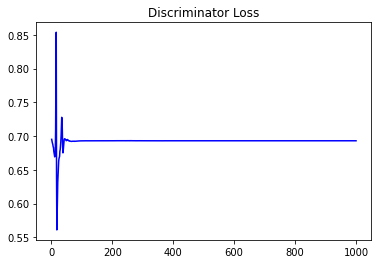

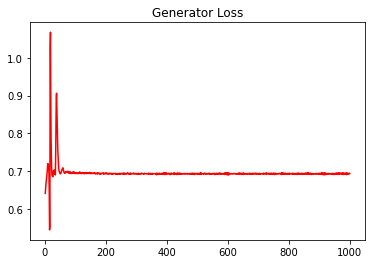

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.055943335643010336


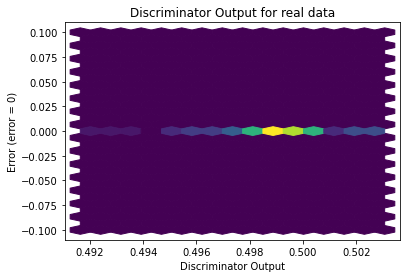

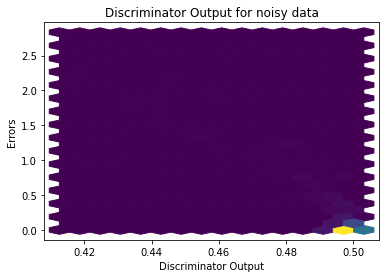

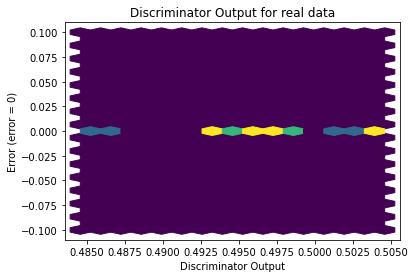

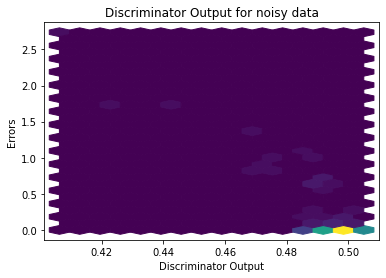

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


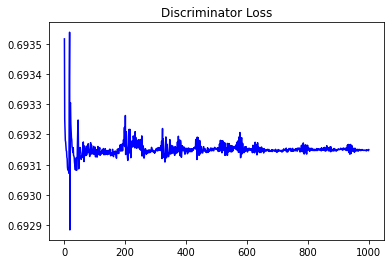

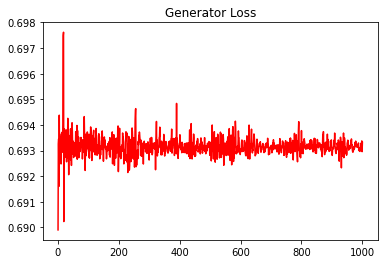

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12608437096780167


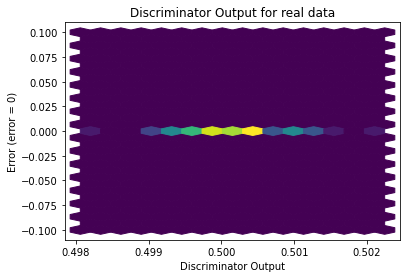

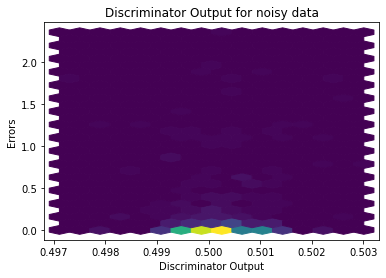

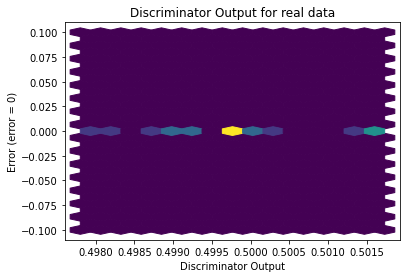

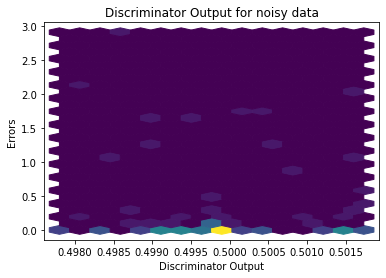

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0192]], requires_grad=True)
